# Parallel agents in multi-agent workflows

In [1]:
import operator
from typing import Annotated
from typing_extensions import TypedDict


class State(TypedDict):
    report_url: str
    financial_metrics: dict
    sentiment_analysis: str
    final_decision_report: str
    aggregate: Annotated[list, operator.add]

In [2]:
import time

def financial_metrics_extractor(state: State):
    print("financial_metrics_extractor agent called")
    report_url = state["report_url"]
    
    # Process report url to extract key financial metrics
    
    extracted_metrics = {"revenue": 10, "EPS": 2}
    return {"financial_metrics": extracted_metrics, "aggregate": [extracted_metrics]}

def sentiment_analyzer(state: State):
    print("sentiment_analyzer agent called")
    report_url = state["report_url"]

    time.sleep(3)
    
    # Process report url to perform sentiment analysis

    sentiment_analysis = "Line 3 is positive Line 45 is very negative"
    return {"sentiment_analysis": sentiment_analysis, "aggregate": [sentiment_analysis]}

def final_report_generator(state: State):
    print("final_report_generator agent called")
    financial_metrics = state["financial_metrics"]
    sentiment_analysis = state["sentiment_analysis"]
    
    # Use the 2 inputs to come up with the final report
    
    final_decision_report = "Crazy report for you to make decision"
    return {"final_decision_report": final_decision_report, "aggregate": [final_decision_report]}

In [3]:
from langgraph.graph import START, END, StateGraph

graph_builder = StateGraph(State)

graph_builder.add_node("mtrc_ext", financial_metrics_extractor)
graph_builder.add_node("snt_ext", sentiment_analyzer)
graph_builder.add_node("fnl_rprt", final_report_generator)

graph_builder.add_edge(START, "mtrc_ext")
graph_builder.add_edge(START, "snt_ext")
graph_builder.add_edge("mtrc_ext", "fnl_rprt")
graph_builder.add_edge("snt_ext", "fnl_rprt")
graph_builder.add_edge("fnl_rprt", END)

graph = graph_builder.compile()

In [11]:
from IPython.display import Image

In [ ]:
print(graph.get_graph().draw_ascii())

           +-----------+            
           | __start__ |            
           +-----------+            
           **         ***           
         **              *          
        *                 **        
+----------+           +---------+  
| mtrc_ext |           | snt_ext |  
+----------+           +---------+  
           **         ***           
             **      *              
               *   **               
           +----------+             
           | fnl_rprt |             
           +----------+             
                 *                  
                 *                  
                 *                  
            +---------+             
            | __end__ |             
            +---------+             


: 

In [7]:
result = graph.invoke({"report_url": "test.com"})
result

financial_metrics_extractor agent called
sentiment_analyzer agent called
final_report_generator agent called


{'report_url': 'test.com',
 'financial_metrics': {'revenue': 10, 'EPS': 2},
 'sentiment_analysis': 'Line 3 is positive Line 45 is very negative',
 'final_decision_report': 'Crazy report for you to make decision',
 'aggregate': [{'revenue': 10, 'EPS': 2},
  'Line 3 is positive Line 45 is very negative',
  'Crazy report for you to make decision']}

In [16]:
class State(TypedDict):
    report_url: str
    financial_metrics: dict
    sentiment_analysis: str
    intermediate_sentiment_report: str
    final_decision_report: str
    aggregate: Annotated[list, operator.add]

In [17]:
import time

def financial_metrics_extractor(state: State):
    report_url = state["report_url"]
    
    # Process report url to extract key financial metrics
    
    extracted_metrics = {"revenue": 10, "EPS": 2}
    return {"financial_metrics": extracted_metrics, "aggregate": [extracted_metrics]}

def sentiment_analyzer(state: State):
    report_url = state["report_url"]
    
    # Process report url to perform sentiment analysis
    
    sentiment_analysis = "Line 3 is positive Line 45 is very negative"
    return {"sentiment_analysis": sentiment_analysis, "aggregate": [sentiment_analysis]}

def sentiment_report_generator(state: State):
    sentiment_analysis = state["sentiment_analysis"]
    
    # Process sentiment analysis to generate an intermediate senitment based report
    
    intermediate_sentiment_report = "Buy because following positives, sell because following negatives"
    return {"intermediate_sentiment_report": intermediate_sentiment_report, "aggregate": [intermediate_sentiment_report]}

def final_report_generator(state: State):
    financial_metrics = state["financial_metrics"]
    intermediate_sentiment_report = state["intermediate_sentiment_report"]
    
    # Use the 2 inputs to come up with the final report
    
    final_decision_report = "Crazy report for you to make decision"
    return {"final_decision_report": final_decision_report, "aggregate": [final_decision_report]}

In [21]:
from langgraph.graph import START, END, StateGraph

graph_builder = StateGraph(State)

graph_builder.add_node("mtrc_ext", financial_metrics_extractor)
graph_builder.add_node("snt_ext", sentiment_analyzer)
graph_builder.add_node("snt_rprt", sentiment_report_generator)
graph_builder.add_node("fnl_rprt", final_report_generator)

graph_builder.add_edge(START, "mtrc_ext")
graph_builder.add_edge(START, "snt_ext")
graph_builder.add_edge("snt_ext", "snt_rprt")
graph_builder.add_edge(["mtrc_ext", "snt_rprt"], "fnl_rprt")
graph_builder.add_edge("fnl_rprt", END)

graph = graph_builder.compile()

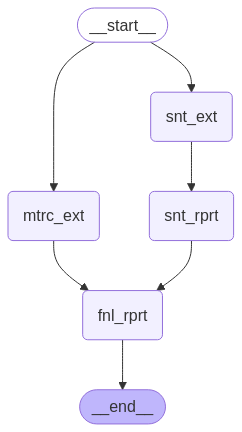

In [22]:
graph

In [23]:
result = graph.invoke({"report_url": "test.com"})
result

{'report_url': 'test.com',
 'financial_metrics': {'revenue': 10, 'EPS': 2},
 'sentiment_analysis': 'Line 3 is positive Line 45 is very negative',
 'intermediate_sentiment_report': 'Buy because following positives, sell because following negatives',
 'final_decision_report': 'Crazy report for you to make decision',
 'aggregate': [{'revenue': 10, 'EPS': 2},
  'Line 3 is positive Line 45 is very negative',
  'Buy because following positives, sell because following negatives',
  'Crazy report for you to make decision']}